In [7]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import copy

Sample image load

In [3]:
axialpath = 'D:/research/lung/226130589/226130589 axial/'
orgpath = 'D:/research/lung/thin section CT/'

(512, 512, 3) (512, 512, 3)


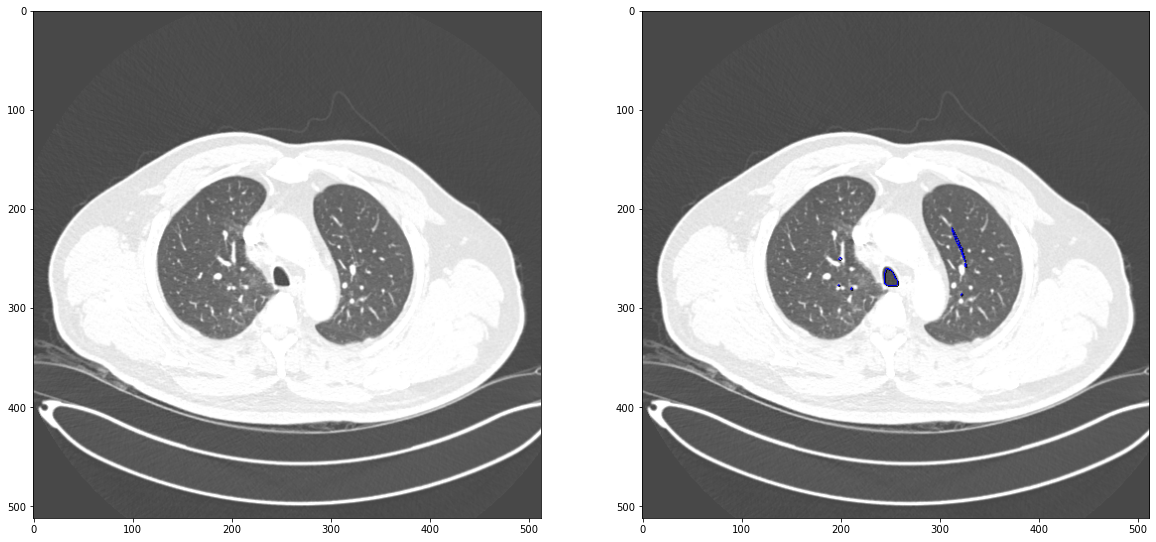

In [11]:
orgtest = cv2.imread(orgpath+'org2261305890207.tif')
test = cv2.imread(axialpath+'2261305890207.tif')
print(orgtest.shape, test.shape)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(orgtest)
plt.subplot(122)
plt.imshow(test)
plt.show()

Find labeled contour by doctor

In [32]:
line = np.where((test[:,:,2]-test[:,:,0])>200 )

mask = np.zeros((512,512))
for i in range(len(line[0])):
    mask[line[0][i]][line[1][i]]=255

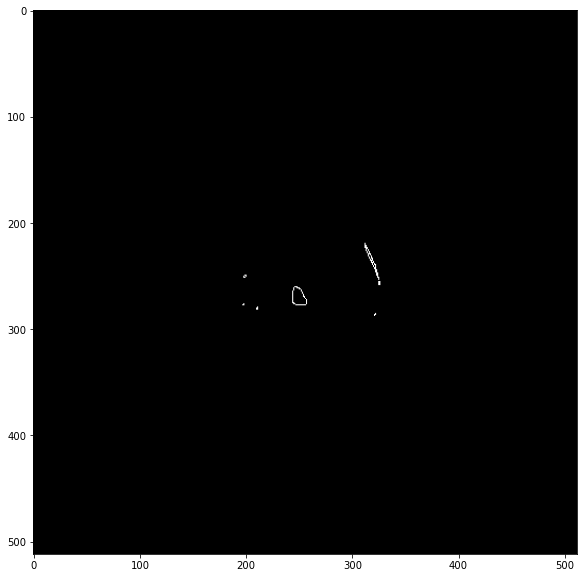

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(mask,'gray')
plt.show()

In [34]:
mask = np.uint8(mask)
contour,hi = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)    

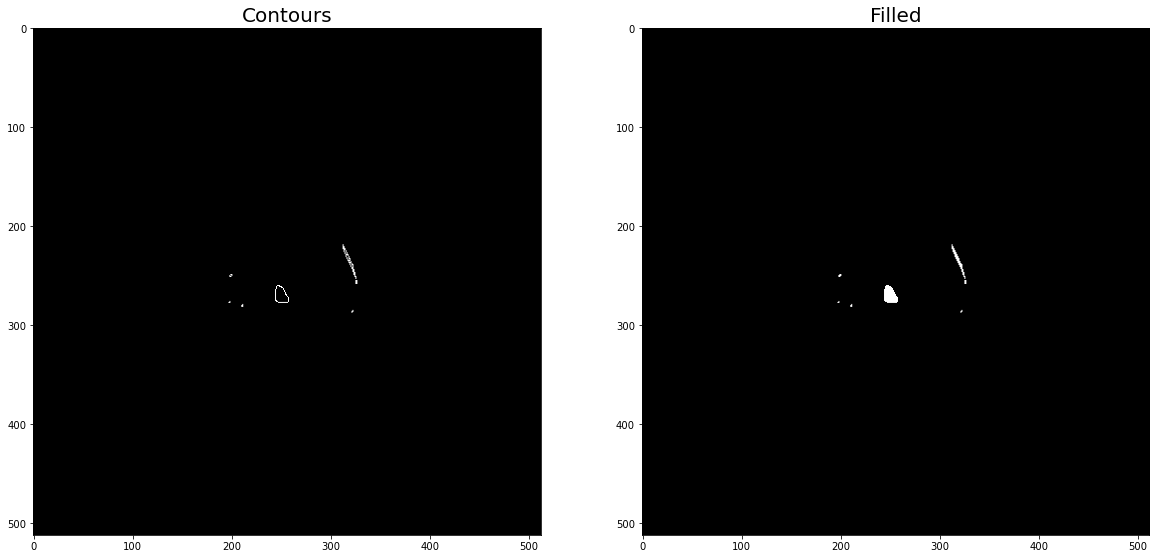

In [41]:
# suppose contour as polygon
filled = copy.deepcopy(mask)
for i in range(len(contour)):
    a = cv2.fillPoly(filled, pts=[contour[i]], color=255)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(mask,'gray')
plt.title('Contours',fontsize=20)
plt.subplot(122)
plt.imshow(a,'gray')
plt.title('Filled',fontsize=20)
plt.show()